# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

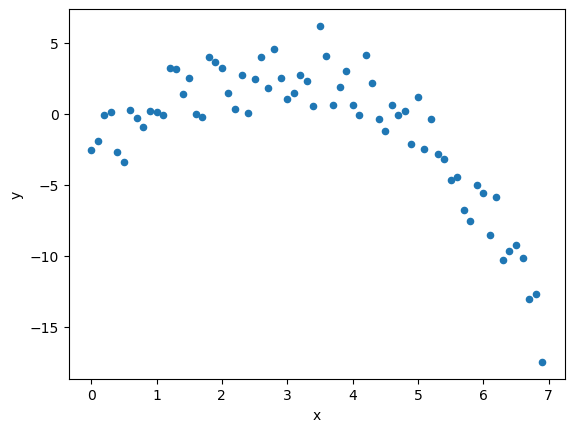

In [3]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x = xy_data[:,0]
y = xy_data[:,1]

plt.scatter(x, y, s=20)   # s can be used to adjust the size of the dots
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('xy_plot.pdf', bbox_inches = 'tight')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [4]:
def polyreg(data_matrix, k):
    x_priv = data_matrix[:,0]
    y_priv = data_matrix[:,1]
    
    all_ones = np.ones(np.shape(x_priv))

    columns = [all_ones]
    for power in range(1, k + 1):
        columns.append(x_priv ** power)
    X = np.column_stack(columns)
    
    y_values = y_priv

    beta = np.linalg.lstsq(X, y_values, rcond=None)[0]
    fit = X.dot(beta)
    resid = y_values - fit
    return [beta, fit, resid]

Use the tests below to check the outputs of the function you have written:

In [5]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

2th power fit, SSE is 172.18102528988547, R_square is 0.8876.
3th power fit, SSE is 152.40580488915805, R_square is 0.9005.
4th power fit, SSE is 151.22778969027124, R_square is 0.9013.


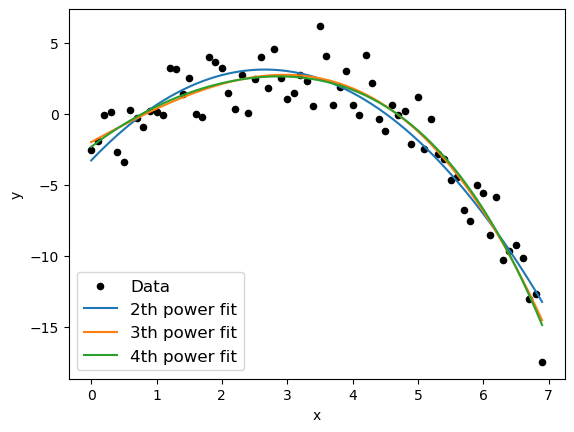

In [6]:
def plot_fit_and_data(data, k_list):
    x = data[:,0]
    y = data[:,1]
    
    plt.xlabel("x")
    plt.ylabel("y")
    _, fit_0, _ = polyreg(data, 0)
    
    plt.rcParams['figure.figsize'] = [12, 7]
    plt.scatter(x, y, s=20, color = "black", label = "Data")
    for i in k_list:
        beta_priv, fit_priv, resid_priv = polyreg(data, i)
        plt.plot(x, fit_priv, label = f"{i}th power fit")
        SSE = np.linalg.norm(y - fit_priv)**2
        SSE_0 = np.linalg.norm(y - fit_0)**2
        R_square = np.round_(1- SSE/SSE_0, decimals = 4)
        print(f"{i}th power fit, SSE is {SSE}, R_square is {R_square}.")
        
    plt.legend(fontsize = "large")
    plt.savefig('k_fit.pdf', bbox_inches = 'tight')
    plt.show()
    

plot_fit_and_data(xy_data, [2, 3, 4])

 #### State which model you choose and briefly justify your choice.
 
 
I will choose 3th power fit, as it has a similar R_square value compared with 4th power fit, and the SSE is also smaller than that of 2th power fit.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

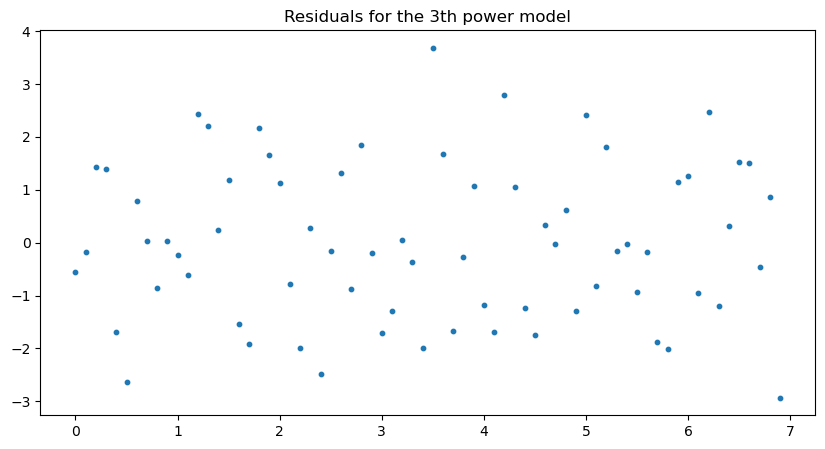

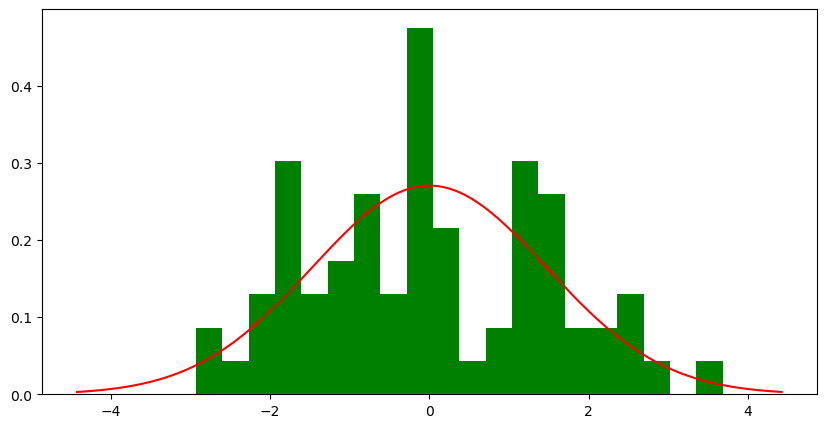

In [7]:
from scipy.stats import norm

x = xy_data[:,0]
y = xy_data[:,1]

beta_priv, fit_priv, resid_priv = polyreg(xy_data, 3)

resid_priv = y - fit_priv

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x, resid_priv, s=10)
plt.title('Residuals for the 3th power model')
plt.savefig('quad_resid_3th_power_ex1.png', bbox_inches = 'tight')
plt.show() 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_priv, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_priv_stdev = np.std(resid_priv)  #standard deviation of residuals
xvals = np.linspace(-3*res_priv_stdev,3*res_priv_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_priv_stdev), 'r')
plt.show()
